In [1]:
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
Dataset2_fake = pd.read_csv("/content/Fake.csv")
Dataset2_true = pd.read_csv("/content/True.csv")

In [ ]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [ ]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [ ]:
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
print(f"Total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


<ipython-input-18-ad82cc5254fc>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,count in Dataset2_true.subject.value_counts().iteritems():


In [ ]:
for key,count in Dataset2_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
print(f"Total Records:\t{Dataset2_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


<ipython-input-19-26abe1195d6e>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,count in Dataset2_fake.subject.value_counts().iteritems():


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_true)
plt.show()

TypeError: ignored

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_fake)
plt.show()

TypeError: ignored

<Figure size 800x500 with 0 Axes>

In [ ]:
Dataset2_true['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])
Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1)
Dataset2 = Dataset2.loc[:,['Article','label']]

In [ ]:
Dataset2

,Article,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [ ]:
Dataset2.head()

,Article,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


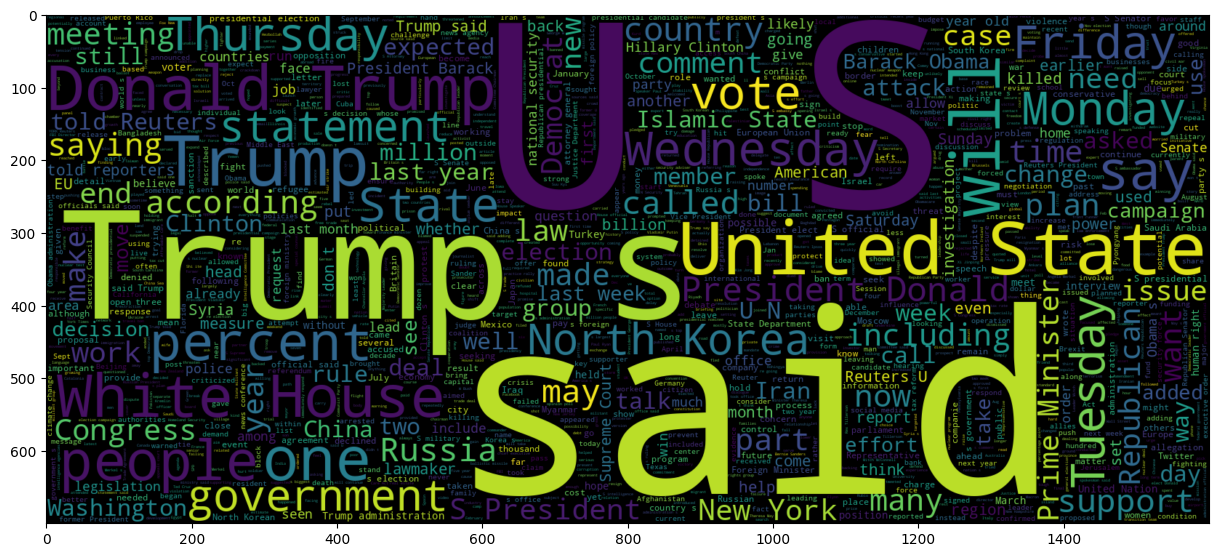

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

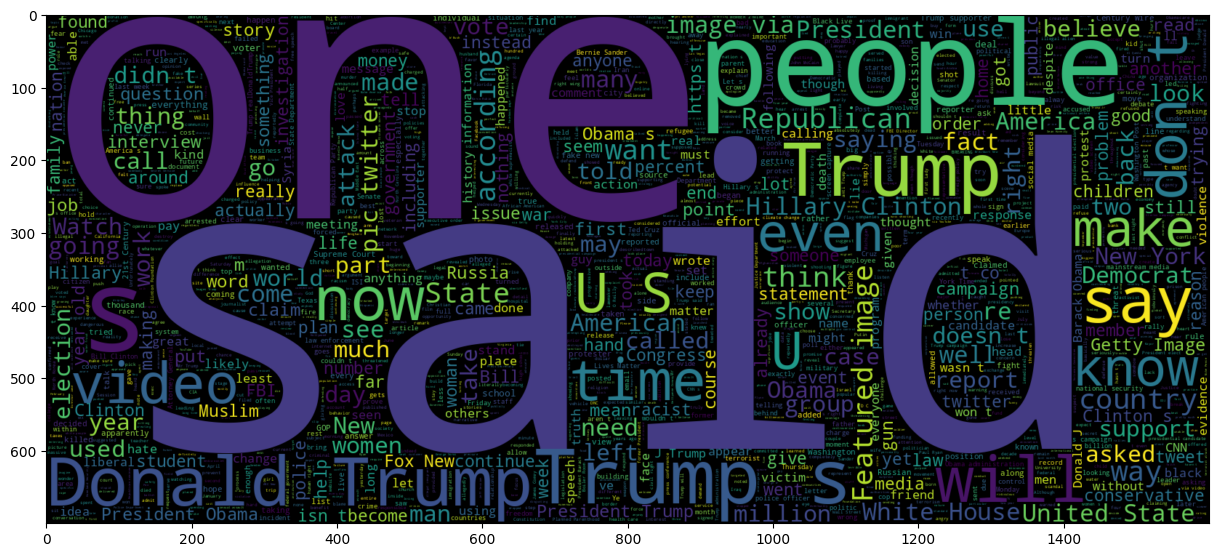

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")